In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from plot_utils import plot_event_history

In [3]:
sns.set_style("whitegrid")

In [4]:
mab_log = pd.read_csv("mab_log.csv")
mab_arms = pd.read_csv("mab_arms.csv")
event_history = pd.read_csv("event_history.csv", index_col=False).dropna().sort_values(by="event")
quit_sold = event_history.loc[event_history.event.isin(["quit", "sold"])]
mab_arms.group = mab_arms.group.replace({0: "Medium", 1: "High", 2: "Low"})

In [ ]:
quit_sold.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group"]).agg(
    count=("run_id", "count"),
)

In [ ]:
event_history.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group", "event"]).agg(
    count=("run_id", "count"),
)

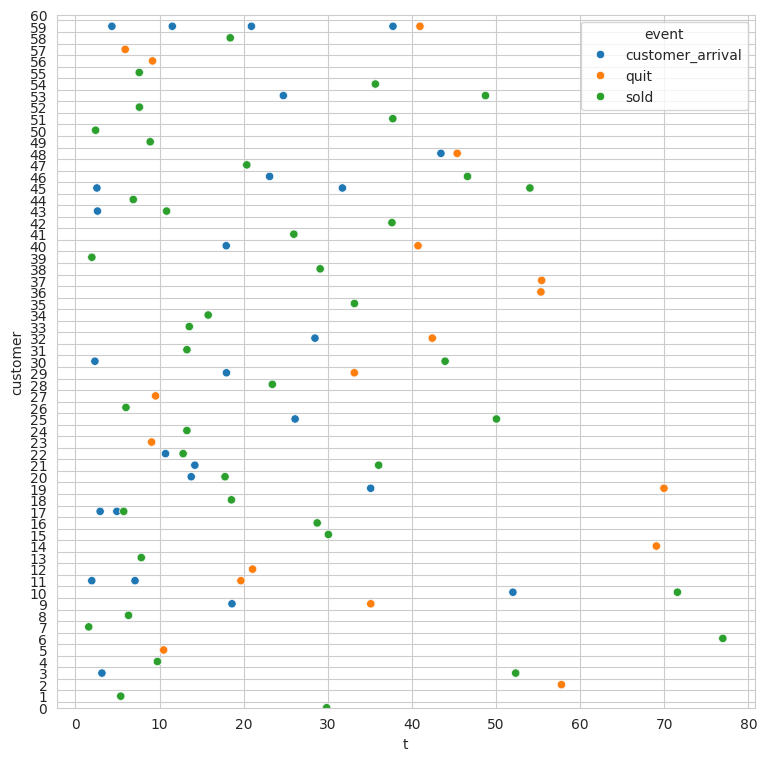

In [7]:
fig, axs = plt.subplots(1,1, figsize=(9, 9))
plot_event_history(axs, event_history.loc[event_history.run_id == 0])
# plot_event_history(axs[1], event_history.loc[event_history.run_id == 3])

In [ ]:
sns.lineplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="price",
    hue="actual_group"
)
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="adjusted_wtp",
    hue="actual_group",
    # shape='event'
)

<Axes: xlabel='customer', ylabel='price'>

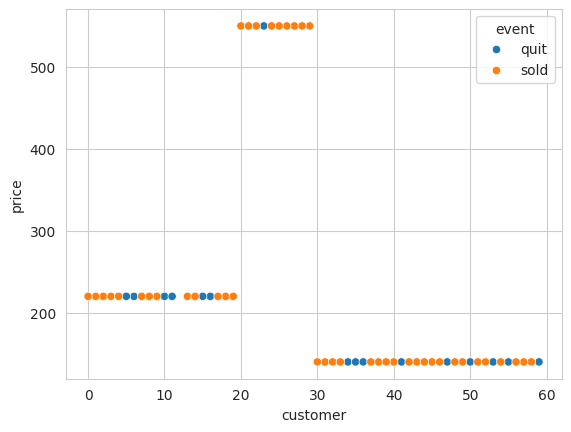

In [74]:
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="customer",
    y="price",
    hue="event",
    # shape='event'
)

In [30]:
mab_res = mab_log.groupby(["config_id", "run_id"]).agg(
    total_reward=('reward', 'sum'),
).reset_index()

In [32]:
mab_res["Clustering Accuracy"] = mab_res.config_id.replace(0, "high").replace(1, "low")

<Axes: xlabel='run_id', ylabel='total_reward'>

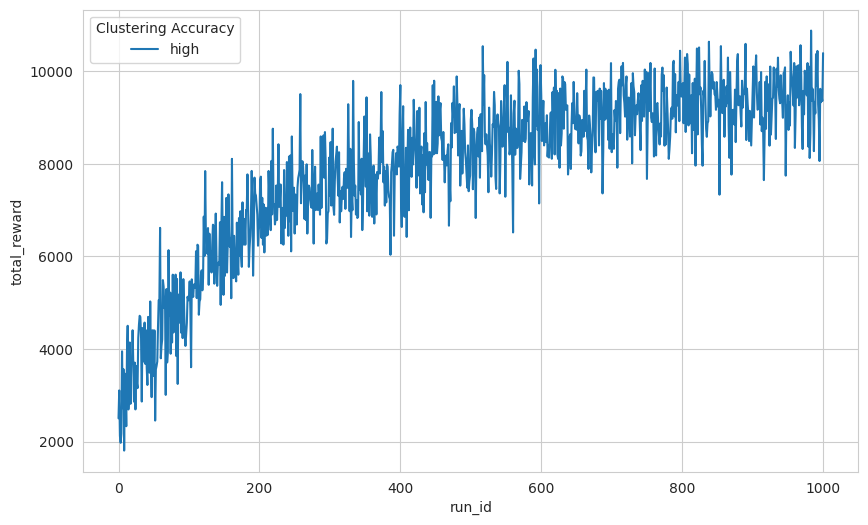

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="run_id",
    y="total_reward",
    data=mab_res,
    hue="Clustering Accuracy",
)

Text(0, 0.5, 'Best Price')

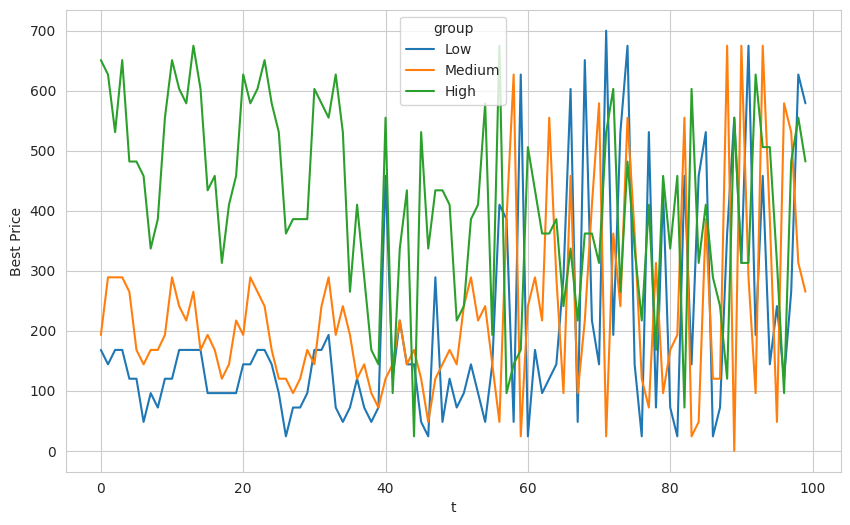

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=ax,
)

ax.set_ylabel("Best Price")

Text(0, 0.5, 'Best Price')

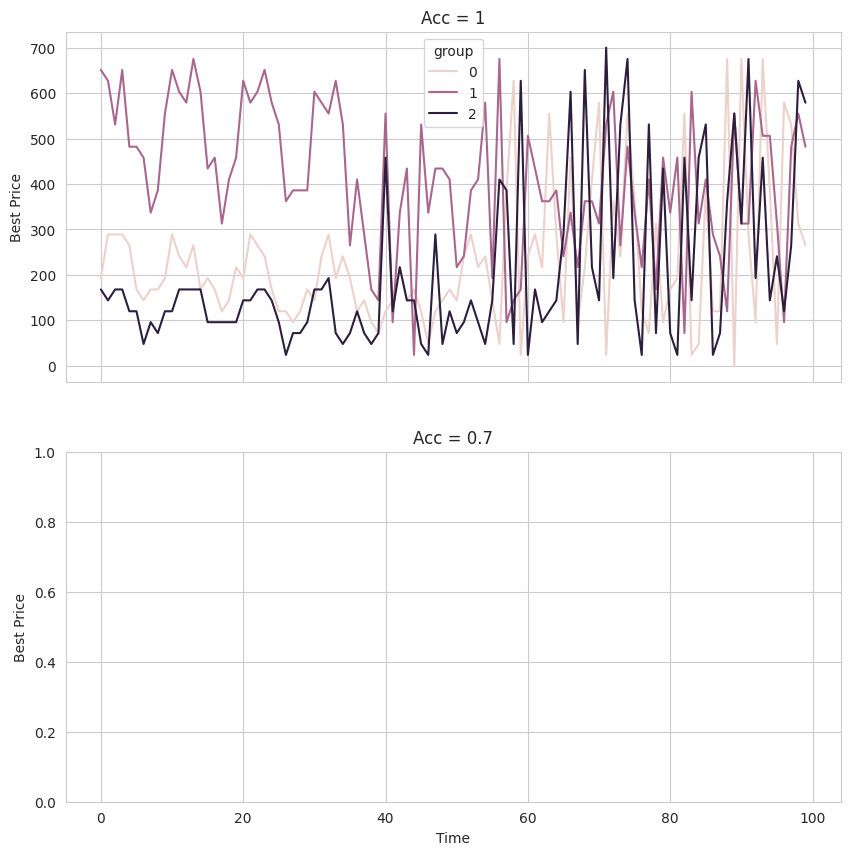

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[0],
)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[1],
)
axs[0].set_title("Acc = 1")
axs[1].set_title("Acc = 0.7")
axs[1].set_xlabel("Time")
axs[0].set_ylabel("Best Price")
axs[1].set_ylabel("Best Price")

In [11]:
reward_by_arm_over_time = mab_log.loc[mab_log.group == 1].groupby(["price", "run_id"]).agg(
    avg_reward=('reward', 'mean'),
).reset_index()

<Axes: xlabel='run_id', ylabel='price'>

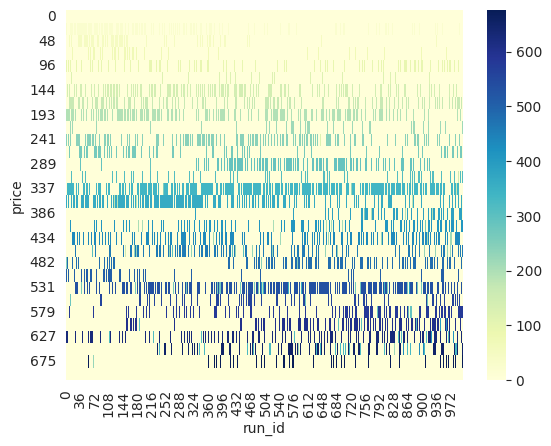

In [16]:
sns.heatmap(
    data=reward_by_arm_over_time.pivot(
        index="price",
        columns="run_id",
        values="avg_reward"
    ).fillna(0),
    cmap="YlGnBu",
)

<Axes: xlabel='run_id', ylabel='avg_reward'>

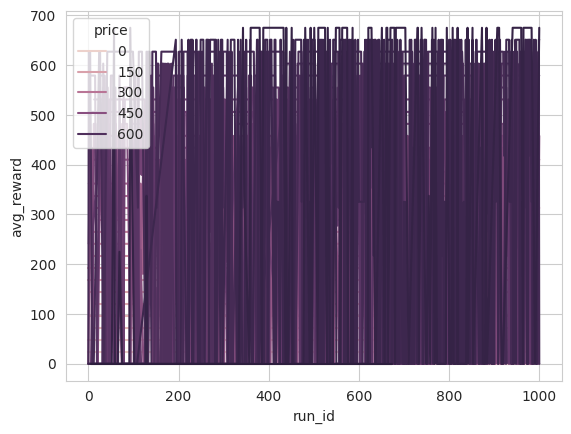

In [7]:
sns.lineplot(
    data=reward_by_arm_over_time,
hue   ="price",
    y="avg_reward",
    x="run_id",
)